<a href="https://colab.research.google.com/github/vedantzope9/ML_mspa/blob/main/Mspa_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
# Preprocess data

df=df.dropna()
features = ['release_year', 'duration']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Apply K-Means clustering

kmeans = KMeans(n_clusters=5 , random_state=0)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

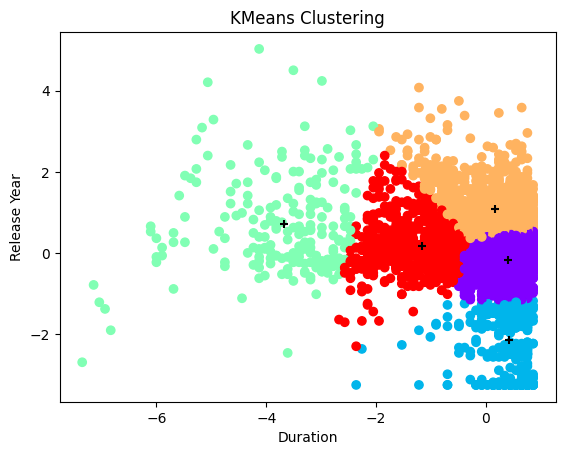

In [36]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

# Create scatter plot
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')

# Plot cluster centers
plt.scatter(centers[:,0] , centers[:,1], color='black', marker='+')

plt.xlabel('Duration')
plt.ylabel('Release Year')
plt.title('KMeans Clustering')
plt.show()

In [37]:
#Principal component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


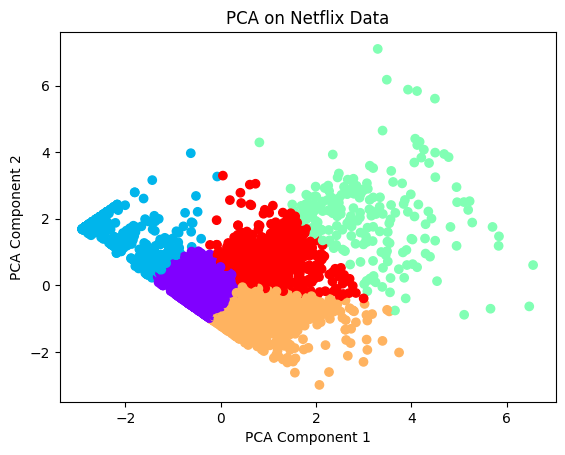

In [38]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Netflix Data')
plt.show()